In [43]:
import sys
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
sys.path.insert(0, 'C:/Users/MyPC/Desktop/git/AVATAR_motionMap')
import FileManager.csvload as acl
save_path = r'C:\Users\MyPC\Desktop\실험실\2.실험데이터\AVATAR-SDSBD'

df = pd.read_excel(r'C:\Users\MyPC\Desktop\실험실\2.실험데이터\AVATAR-SDSBD\AVATAR_SDSBD총정리.xlsx')
df['SIratio-postSD'] = pd.to_numeric(df['SIratio-postSD'], errors='coerce')     # SIratio-postSD를 숫자로 변환 (문자열이 있으면 NaN으로 변환)
#df_cleaned = df.dropna(subset=['SIratio-postSD'])     # SIratio-postSD에 NaN이 있으면 해당 행 삭제
filtered_df = df[(df['group_for_aftersubtle'] != 'control') & (df['SIratio-postSD'] < 1)]
my_dict = dict(zip(filtered_df['mouse_name'], filtered_df['SIratio-postSD']))
print(my_dict)

{102: 0.922203, 103: 0.881327, 106: 0.922504, 107: 0.657534, 108: 0.287469, 111: 0.187187, 113: 0.384673, 114: 0.30692, 115: 0.659213, 202: 0.911846, 203: 0.400973, 206: 0.387418, 208: 0.264255, 210: 0.259217, 212: 0.341958, 214: 0.24345, 215: 0.039135, 218: 0.311278, 219: 0.302909, 301: 0.3013105560569491, 302: 0.8291034158181775, 304: 0.9996324028764787, 307: 0.2346704871060172, 309: 0.7710254981027433, 310: 0.16270030576569652, 312: 0.8871441244863113, 313: 0.19346015351143012, 314: 0.8609548981025454, 315: 0.9557253209762014, 408: 0.5140063527044347, 414: 0.6245707937790347, 416: 0.430005958612471, 417: 0.14553133333966048, 418: 0.8874184465580061, 501: 0.8733067537707753, 503: 0.5242965185324082, 504: 0.9258411339201102, 508: 0.49393827757179604, 510: 0.169197562969017, 514: 0.7837299434037157, 515: 0.2246446843990671}


c:\Users\MyPC\anaconda3\envs\SUBTLE\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


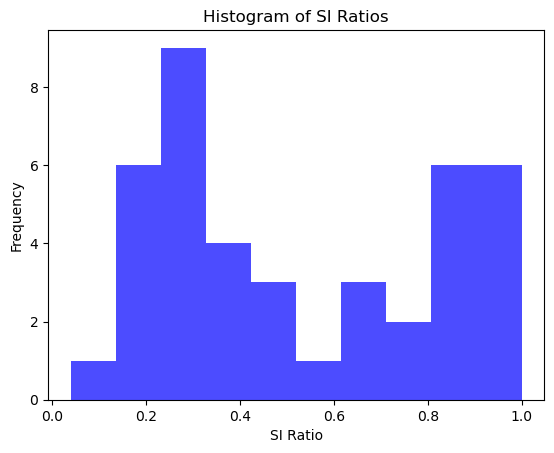

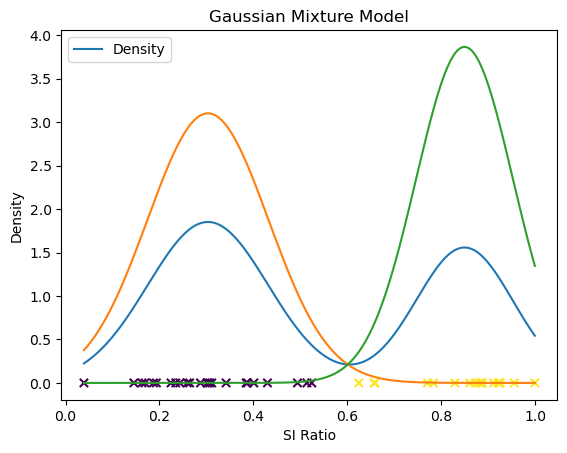

In [44]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

si_ratios = list(my_dict.values())  # my_dict에서 SI ratio 값들을 추출
data = np.array(si_ratios).reshape(-1, 1)   # numpy 배열로 변환

# GMM 모델 정의 및 학습
gmm = GaussianMixture(n_components=2)
gmm.fit(data)

# 각 데이터 포인트가 어느 분포에 속하는지 예측
labels = gmm.predict(data)

# SI ratio에 따른 히스토그램 생성 및 저장
plt.hist(data, bins=10, color='blue', alpha=0.7)
plt.title("Histogram of SI Ratios")
plt.xlabel("SI Ratio")
plt.ylabel("Frequency")
plt.savefig(os.path.join(save_path, 'histogram_si_ratio.png'))  # 히스토그램 저장
plt.show()


# 데이터 밀도 플롯
x = np.linspace(np.min(data), np.max(data), 1000)
densities = gmm.score_samples(x.reshape(-1, 1))

# 각 분포에 대한 평균과 분산
means = gmm.means_.flatten()
variances = gmm.covariances_.flatten()

# 결과 시각화
plt.scatter(data, np.zeros_like(data), c=labels, cmap='viridis', marker='x')
plt.plot(x, np.exp(densities), label='Density')
for mean, var in zip(means, variances):
    plt.plot(x, norm.pdf(x, mean, np.sqrt(var)))

plt.title("Gaussian Mixture Model")
plt.xlabel("SI Ratio")
plt.ylabel("Density")
plt.legend()
plt.savefig(os.path.join(save_path, 'GMM_results.png'))  # figure 저장
plt.show()

In [46]:
import csv
total_dict = {}
total_dict = my_dict.copy()  # my_dict를 total_dict에 복사

for i, mouse in enumerate(total_dict.keys()):
    si_ratio = total_dict[mouse]  # 현재 si_ratio 값을 저장
    total_dict[mouse] = {'si_ratio': si_ratio, 'label': labels[i]}
    
# CSV 파일 경로 설정
output_file = r'C:\Users\MyPC\Desktop\실험실\2.실험데이터\AVATAR-SDSBD\label_extremeS.csv'  # 여기에 원하는 경로와 파일명 입력

# CSV 파일 작성
with open(output_file, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    
    # CSV 파일의 헤더 작성
    writer.writerow(['mouse_name', 'si_ratio', 'label'])
    
    # my_dict의 내용을 행으로 작성
    for mouse, values in total_dict.items():
        writer.writerow([mouse, values['si_ratio'], values['label']])

print(total_dict)

{102: {'si_ratio': 0.922203, 'label': 1}, 103: {'si_ratio': 0.881327, 'label': 1}, 106: {'si_ratio': 0.922504, 'label': 1}, 107: {'si_ratio': 0.657534, 'label': 1}, 108: {'si_ratio': 0.287469, 'label': 0}, 111: {'si_ratio': 0.187187, 'label': 0}, 113: {'si_ratio': 0.384673, 'label': 0}, 114: {'si_ratio': 0.30692, 'label': 0}, 115: {'si_ratio': 0.659213, 'label': 1}, 202: {'si_ratio': 0.911846, 'label': 1}, 203: {'si_ratio': 0.400973, 'label': 0}, 206: {'si_ratio': 0.387418, 'label': 0}, 208: {'si_ratio': 0.264255, 'label': 0}, 210: {'si_ratio': 0.259217, 'label': 0}, 212: {'si_ratio': 0.341958, 'label': 0}, 214: {'si_ratio': 0.24345, 'label': 0}, 215: {'si_ratio': 0.039135, 'label': 0}, 218: {'si_ratio': 0.311278, 'label': 0}, 219: {'si_ratio': 0.302909, 'label': 0}, 301: {'si_ratio': 0.3013105560569491, 'label': 0}, 302: {'si_ratio': 0.8291034158181775, 'label': 1}, 304: {'si_ratio': 0.9996324028764787, 'label': 1}, 307: {'si_ratio': 0.2346704871060172, 'label': 0}, 309: {'si_ratio': 